**3.1 Problem - 1: Getting Started with Data Exploration**


1. Data Exploration and Understanding:


*   Dataset Overview
1. Load the dataset and display the first 10 rows.

In [1]:
import pandas as pd
file_path = '/content/drive/MyDrive/Assignment 1/WHR-2024-5CS037.csv'
dataset = pd.read_csv(file_path)

# Displaying the first 10 rowa
print(dataset.head(10))


  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3                    0.724              

2. Identify the number of rows and columns in the dataset.

In [2]:
num_rows, num_columns = dataset.shape
print(f"The dataset has {num_rows} rows and {num_columns} columns.")

The dataset has 143 rows and 9 columns.


3. List all the columns and their data types.

In [3]:
print("Columns and their data types:")
print(dataset.dtypes)

Columns and their data types:
Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


*    Basic Statistics:
1. Calculate the mean, median, and standard deviation for the Score column.

In [4]:
print(dataset.columns)

average_score = dataset['score'].mean()
middle_score = dataset['score'].median()
score_std_dev = dataset['score'].std()

print(f"Mean of Score: {average_score}")
print(f"Median of Score: {middle_score}")
print(f"Standard Deviation of Score: {score_std_dev}")


Index(['Country name', 'score', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia + residual'],
      dtype='object')
Mean of Score: 5.52758041958042
Median of Score: 5.785
Standard Deviation of Score: 1.1707165099442995


2. Identify the country with the highest and lowest happiness scores.

In [5]:
highest_score = dataset.loc[dataset['score'].idxmax(), 'Country name']
lowest_score = dataset.loc[dataset['score'].idxmin(), 'Country name']

print(f"Country with the highest happiness score: {highest_score}")
print(f"Country with the lowest happiness score: {lowest_score}")

Country with the highest happiness score: Finland
Country with the lowest happiness score: Afghanistan


*   Missing Values:
1. Check if there are any missing values in the dataset. If so, display the total count for each column.

In [6]:
missing_values = dataset.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64



*  Filtering and Sorting:
1. Filter the dataset to show only the countries with a Score greater than 7.5

In [7]:
filtered_dataset = dataset[dataset['score'] > 7.5]

print("Countries with a Score greater than 7.5:")
print(filtered_dataset)

Countries with a Score greater than 7.5:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   

   Perceptions of corruption  Dystopia + residual  
0                      0.546                2.082  
1                      0.548                1.881  
2                      0.182                2.050  


2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the
top 10 rows.

In [8]:
sorted_high_score = dataset[dataset['score'] > 7.5].sort_values(by='Log GDP per capita', ascending=False)
print("Top 10 countries with Score > 7.5, sorted by Log GDP per capita:")
print(sorted_high_score[['Country name', 'Log GDP per capita']].head(10))

Top 10 countries with Score > 7.5, sorted by Log GDP per capita:
  Country name  Log GDP per capita
1      Denmark               1.908
2      Iceland               1.881
0      Finland               1.844


*   Adding New Columns:
1. Create a new column called Happiness Category that categorizes countries into three categories
based on their Score:

Low − (Score < 4)
Medium − (4 ≤ Score ≤ 6)
High − (Score > 6)

In [11]:
# Define the function and categorize countries based on their score
def categorize_happiness(score):
    if score < 4:
        return 'Low'
    elif 4 <= score <= 6:
        return 'Medium'
    else:
        return 'High'

# Assuming you want to categorize the original dataset 'dataset'
dataset.loc[:, 'Happiness Category'] = dataset['score'].apply(categorize_happiness)  # Changed 'south_asia_data' to 'dataset'
print(dataset[['Country name', 'score', 'Happiness Category']])  # Changed 'south_asia_data' to 'dataset'

         Country name  score Happiness Category
0             Finland  7.741               High
1             Denmark  7.583               High
2             Iceland  7.525               High
3              Sweden  7.344               High
4              Israel  7.341               High
..                ...    ...                ...
138  Congo (Kinshasa)  3.295                Low
139      Sierra Leone  3.245                Low
140           Lesotho  3.186                Low
141           Lebanon  2.707                Low
142       Afghanistan  1.721                Low

[143 rows x 3 columns]


2. Data Visualizations:

* Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.

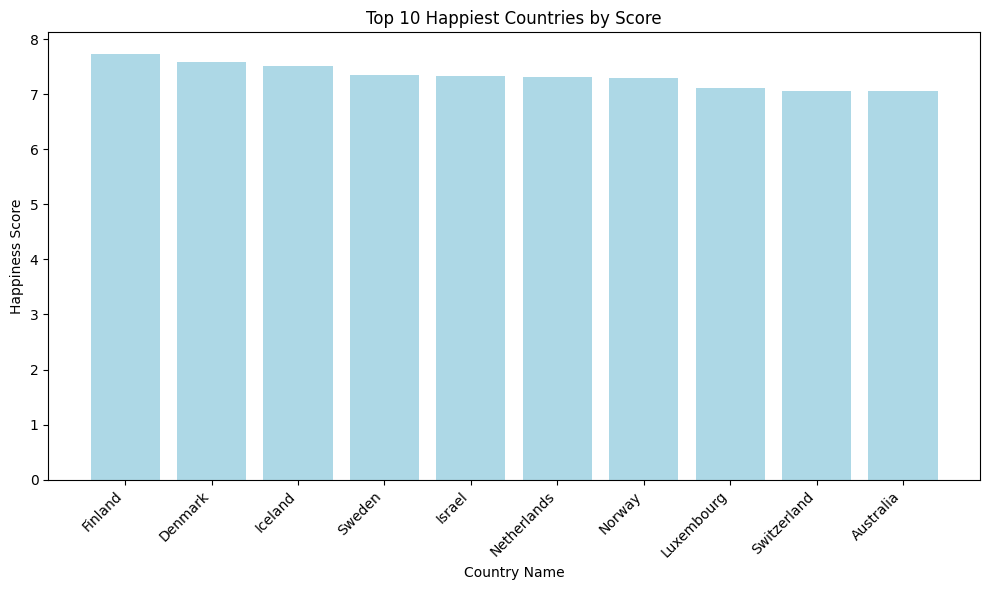

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

top_10_countries = dataset.sort_values(by='score', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10_countries['Country name'], top_10_countries['score'], color='lightblue')
plt.xlabel('Country Name')
plt.ylabel('Happiness Score')
plt.title('Top 10 Happiest Countries by Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


*  Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart

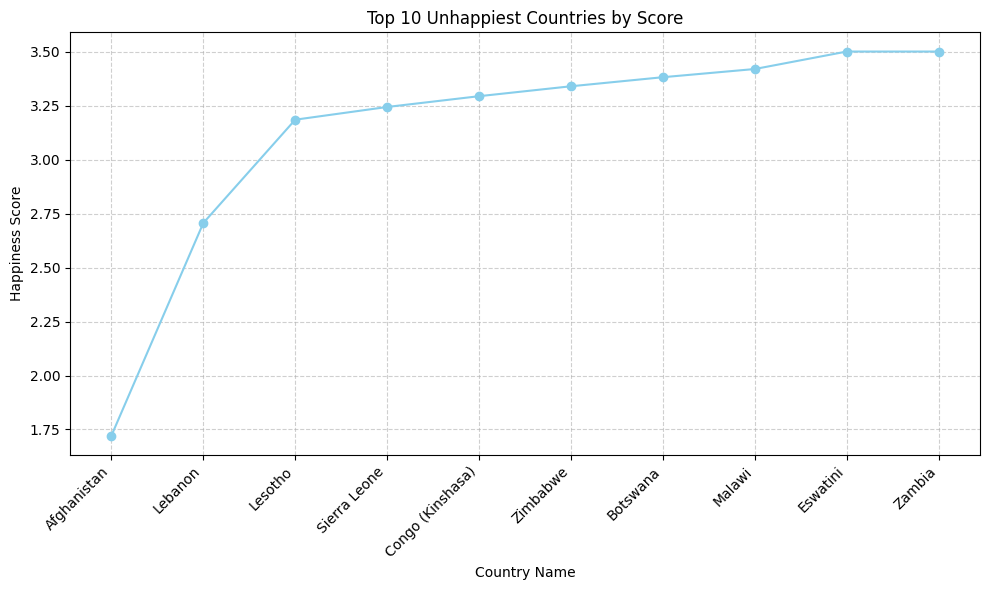

In [13]:
import matplotlib.pyplot as plt

bottom_10_unhappiest = dataset.sort_values(by='score', ascending=True).head(10)

plt.figure(figsize=(10, 6))
plt.plot(bottom_10_unhappiest['Country name'], bottom_10_unhappiest['score'], marker='o', linestyle='-', color='skyblue')
plt.xlabel('Country Name')
plt.ylabel('Happiness Score')
plt.title('Top 10 Unhappiest Countries by Score')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

* Plot a histogram for the Score column to show its distribution and also interpret.

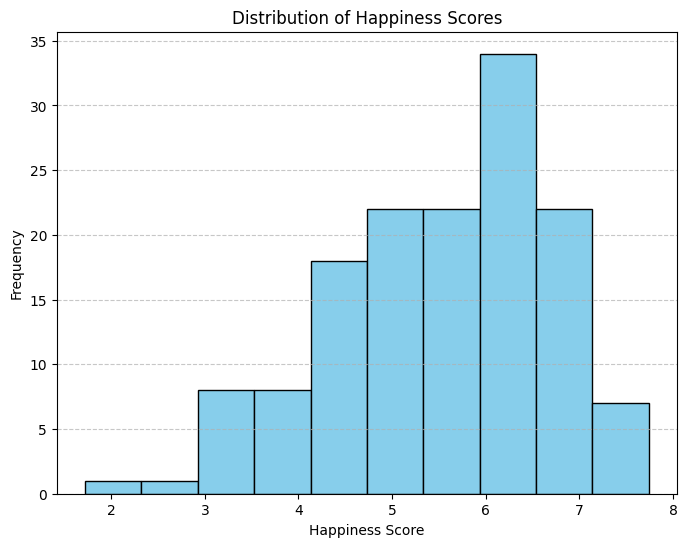

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(dataset['score'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.title('Distribution of Happiness Scores')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

* Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

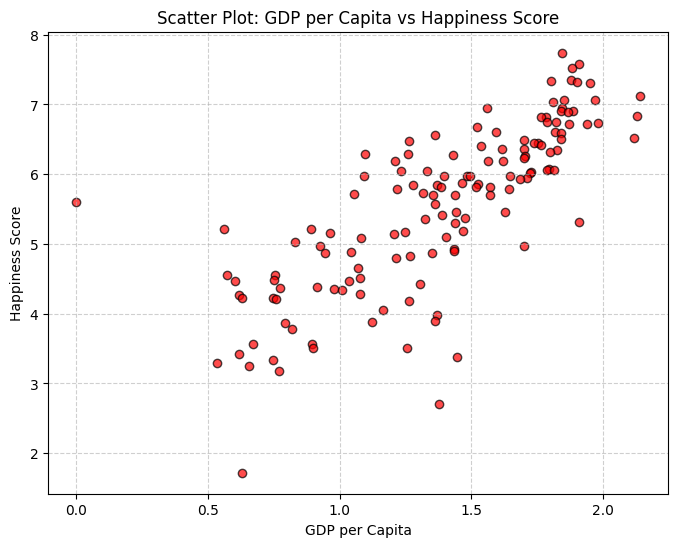

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
# Changing 'GDP per Capita' to 'Log GDP per capita'
plt.scatter(dataset['Log GDP per capita'], dataset['score'], color='red', alpha=0.7, edgecolor='black')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.title('Scatter Plot: GDP per Capita vs Happiness Score')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

**3.2 Problem - 2 - Some Advance Data Exploration Task:**
Define the countries in South Asia with a list for example:
south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",

"Maldives", "Nepal", "Pakistan", "Srilanka"]

In [16]:
# Define the list of South Asian countries
south_asian_nations = ["Afghanistan", "Bangladesh", "Bhutan", "India",
                       "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

south_asian_dataset = dataset[dataset['Country name'].isin(south_asian_nations)]
print(south_asian_dataset)


    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
127    Sri Lanka  3.898               1.361           1.179   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
127                    0.586                         0.583       0.144   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0.091   

     Perceptions of corruption  Dystopi

2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}

In [17]:
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
                         "Maldives", "Nepal", "Pakistan", "Sri Lanka"]


filtered_data = dataset[dataset['Country name'].isin(south_asian_countries)]
print(filtered_data)


    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
127    Sri Lanka  3.898               1.361           1.179   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
127                    0.586                         0.583       0.144   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0.091   

     Perceptions of corruption  Dystopi

3. Save the filtered dataframe as separate CSV files for future use.

In [18]:
# Define the list of South Asian countries
south_asian_nations = ["Afghanistan", "Bangladesh", "Bhutan", "India",
                       "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

south_asian_subset = dataset[dataset['Country name'].isin(south_asian_nations)]

# Save the filtered dataset as a new CSV file
csv_output_path = '/content/drive/MyDrive/Assignment 1/south_asian_subset.csv'
south_asian_subset.to_csv(csv_output_path, index=False)

print(f"Filtered dataset saved successfully to {csv_output_path}")


Filtered dataset saved successfully to /content/drive/MyDrive/Assignment 1/south_asian_subset.csv


Task - 2 - Composite Score Ranking:
1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
following metrics:

  Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support +0.30 × Healthy Life Expectancy

In [24]:
south_asian_subset.loc[:, 'Composite Score'] = (
    0.40 * south_asian_subset['Log GDP per capita'] +
    0.30 * south_asian_subset['Social support'] +
    0.30 * south_asian_subset['Healthy life expectancy']
)

print(south_asian_subset[['Country name', 'Composite Score']])

    Country name  Composite Score
92         Nepal           0.8159
107     Pakistan           0.7039
125        India           0.7874
127    Sri Lanka           1.0739
128   Bangladesh           0.6774
142  Afghanistan           0.3238


<ipython-input-24-f1c45240e3d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asian_subset.loc[:, 'Composite Score'] = (


2. Rank the South Asian countries based on the Composite Score in descending order.

In [26]:
south_asian_subset.loc[:, 'Composite Score'] = (
    0.40 * south_asian_subset['Log GDP per capita'] +
    0.30 * south_asian_subset['Social support'] +
    0.30 * south_asian_subset['Healthy life expectancy']
)
south_asia_data_sorted = south_asian_subset.sort_values(by='Composite Score', ascending=False) # Changed 'south_asia_data' to 'south_asian_subset'
print(south_asia_data_sorted[['Country name', 'Composite Score']]) # Changed 'south_asia_data_sorted' to 'south_asian_subset'

    Country name  Composite Score
127    Sri Lanka           1.0739
92         Nepal           0.8159
125        India           0.7874
107     Pakistan           0.7039
128   Bangladesh           0.6774
142  Afghanistan           0.3238


3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.

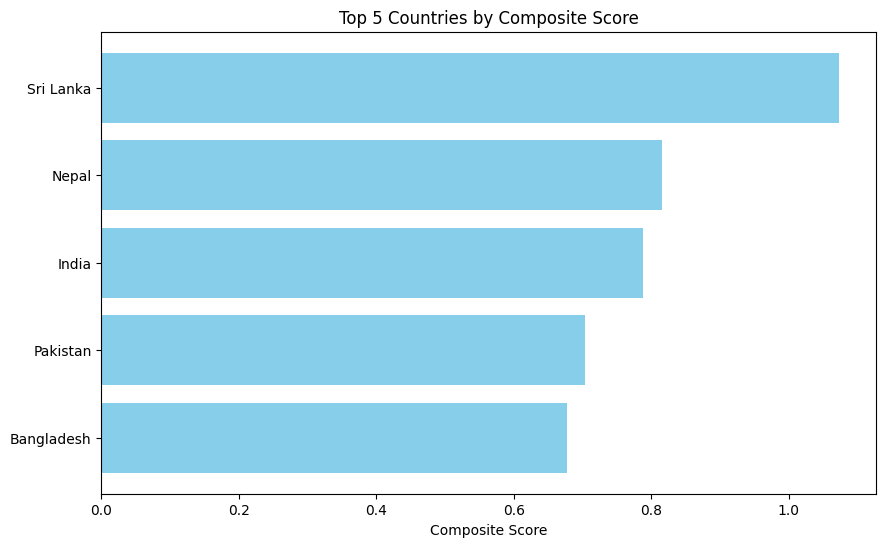

In [28]:
import matplotlib.pyplot as plt

# Replace 'south_asia_data' with 'south_asian_subset'
top_5_countries = south_asian_subset.sort_values(by='Composite Score', ascending=False).head(5)

plt.figure(figsize=(10, 6))
plt.barh(top_5_countries['Country name'], top_5_countries['Composite Score'], color='skyblue')
plt.xlabel('Composite Score')
plt.title('Top 5 Countries by Composite Score')
plt.gca().invert_yaxis()
plt.show()

4. Discuss whether the rankings based on the Composite Score align with the original Score - support your
discussion with some visualization plot.

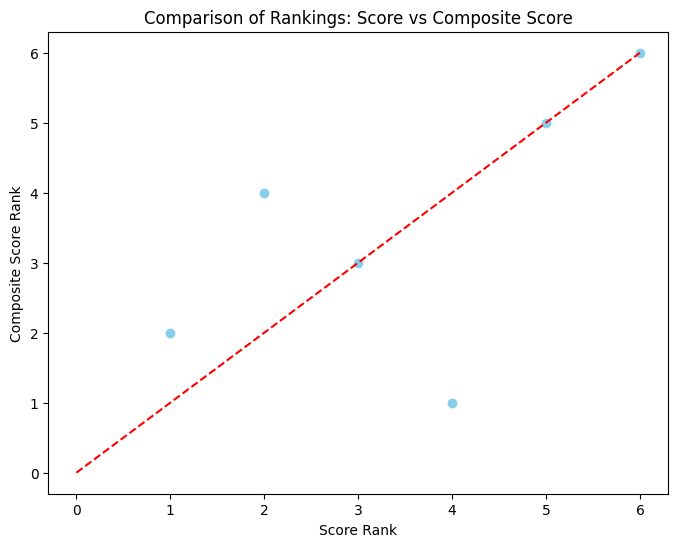

In [30]:
import matplotlib.pyplot as plt

# Replace 'south_asia_data' with 'south_asian_subset'
sorted_by_score = south_asian_subset.sort_values(by='score', ascending=False)
sorted_by_composite_score = south_asian_subset.sort_values(by='Composite Score', ascending=False)

sorted_by_score['Score Rank'] = range(1, len(sorted_by_score) + 1)
sorted_by_composite_score['Composite Score Rank'] = range(1, len(sorted_by_composite_score) + 1)

comparison_df = pd.merge(sorted_by_score[['Country name', 'Score Rank']],
                         sorted_by_composite_score[['Country name', 'Composite Score Rank']],
                         on='Country name')

plt.figure(figsize=(8, 6))
plt.scatter(comparison_df['Score Rank'], comparison_df['Composite Score Rank'], color='skyblue')
plt.plot([0, len(south_asian_subset)], [0, len(south_asian_subset)], color='red', linestyle='--')  # Also changed here
plt.xlabel('Score Rank')
plt.ylabel('Composite Score Rank')
plt.title('Comparison of Rankings: Score vs Composite Score')
plt.show()


Task - 3 - Outlier Detection:
1. Identify outlier countries in South Asia based on their Score and GDP per Capita.

In [31]:
south_asian_countries = [
	    'Afghanistan', 'Bangladesh', 'Bhutan', 'India',
	    'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka'
 ]
south_asia_data = dataset[dataset['Country name'].isin(south_asian_countries)][['Country name', 'score', 'Log GDP per capita']]

# Function to detect outliers using the 1.5 x IQR rule
def detect_outliers(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

score_outliers = detect_outliers(south_asia_data, 'score')
gdp_outliers = detect_outliers(south_asia_data, 'Log GDP per capita')

# Combine outliers from both columns
combined_outliers = pd.concat([score_outliers, gdp_outliers]).drop_duplicates()

print("Outlier countries based on Score and GDP per Capita:")
print(combined_outliers)

Outlier countries based on Score and GDP per Capita:
    Country name  score  Log GDP per capita
142  Afghanistan  1.721               0.628


2. Define outliers using the 1.5 × IQR rule.

In [32]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Example Usage
score_outliers, score_lower, score_upper = detect_outliers(south_asia_data, 'score')
gdp_outliers, gdp_lower, gdp_upper = detect_outliers(south_asia_data, 'Log GDP per capita')

print(f'Score Outlier Bounds: {score_lower:.2f}, {score_upper:.2f}')
print(f'GDP Outlier Bounds: {gdp_lower:.2f}, {gdp_upper:.2f}')

Score Outlier Bounds: 2.96, 5.43
GDP Outlier Bounds: 0.74, 1.40


3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
in a different color.

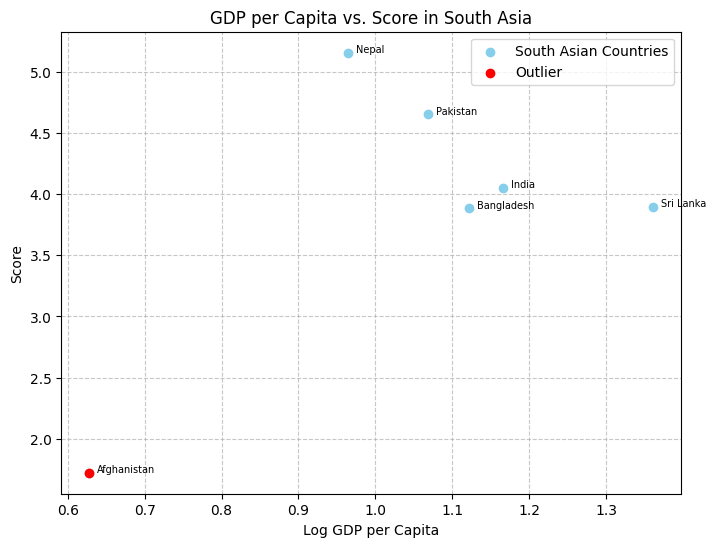

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

south_asian_countries = [
    'Afghanistan', 'Bangladesh', 'Bhutan', 'India',
    'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka'
]
south_asia_data = dataset[dataset['Country name'].isin(south_asian_countries)][['Country name', 'score', 'Log GDP per capita']]

# Function to detect outliers using 1.5 × IQR rule
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

score_outliers = detect_outliers(south_asia_data, 'score')
gdp_outliers = detect_outliers(south_asia_data, 'Log GDP per capita')
combined_outliers = pd.concat([score_outliers, gdp_outliers]).drop_duplicates()

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(south_asia_data['Log GDP per capita'], south_asia_data['score'], color='skyblue', label='South Asian Countries')

plt.scatter(combined_outliers['Log GDP per capita'], combined_outliers['score'], color='red', label='Outlier')

# Annotate country names
for _, row in south_asia_data.iterrows():
    plt.text(row['Log GDP per capita'] + 0.01, row['score'], row['Country name'], fontsize=7)

plt.title('GDP per Capita vs. Score in South Asia')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Score')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

4. Discuss the characteristics of these outliers and their potential impact on regional averages.

In [34]:
south_asian_countries = [
    'Afghanistan', 'Bangladesh', 'Bhutan', 'India',
    'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka'
]
south_asia_data = dataset[dataset['Country name'].isin(south_asian_countries)][[
    'Country name', 'score', 'Freedom to make life choices', 'Generosity'
]]

# Calculate Pearson correlation
correlations = south_asia_data[['score', 'Freedom to make life choices', 'Generosity']].corr(method='pearson')
print("Pearson Correlation with Score:")
print(correlations['score'][1:])


Pearson Correlation with Score:
Freedom to make life choices    0.800519
Generosity                      0.874512
Name: score, dtype: float64


Task - 4 - Exploring Trends Across Metrics:
1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation
{pearson correlation} with the Score for South Asian countries.

In [35]:
south_asian_countries = [
    'Afghanistan', 'Bangladesh', 'Bhutan', 'India',
    'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka'
]
south_asia_data = dataset[dataset['Country name'].isin(south_asian_countries)][[
    'Country name', 'score', 'Freedom to make life choices', 'Generosity'
]]

# Calculate Pearson correlation
correlations = south_asia_data[['score', 'Freedom to make life choices', 'Generosity']].corr(method='pearson')

print("Pearson Correlation with Score:")
print(correlations['score'][1:])


Pearson Correlation with Score:
Freedom to make life choices    0.800519
Generosity                      0.874512
Name: score, dtype: float64


2. Create scatter plots with trendlines for these metrics against the Score.

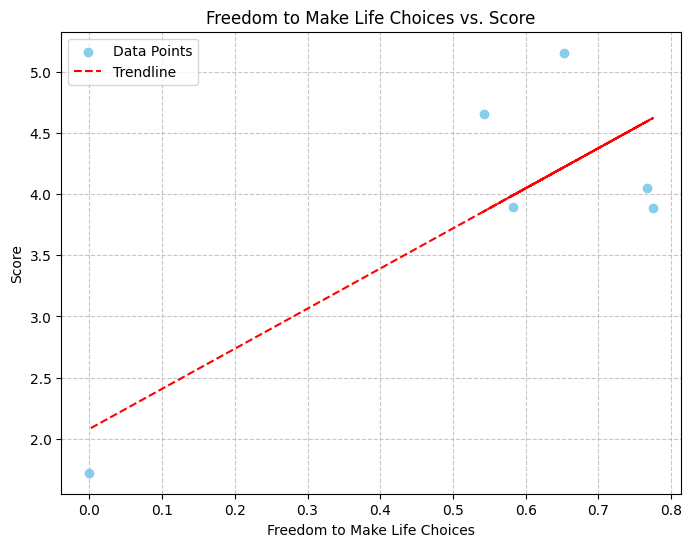

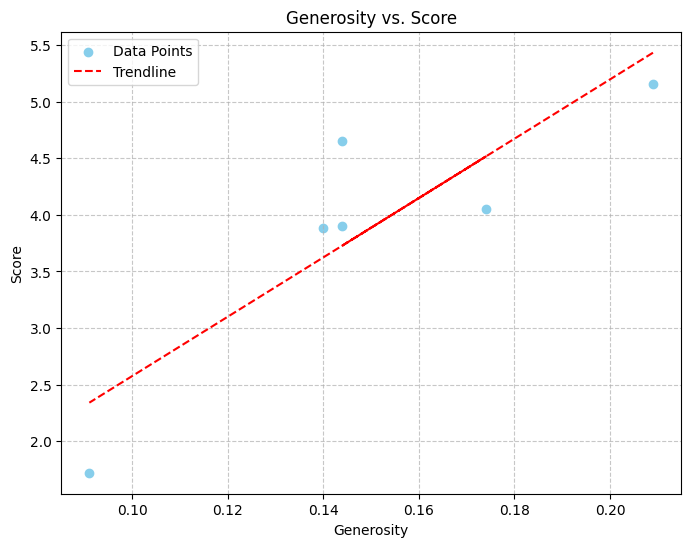

In [39]:
import numpy as np # Importing numpy and assigning it the alias 'np'

south_asian_countries = [
    'Afghanistan', 'Bangladesh', 'Bhutan', 'India',
    'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka'
]
south_asia_data = dataset[dataset['Country name'].isin(south_asian_countries)][[
    'Country name', 'score', 'Freedom to make life choices', 'Generosity'
]]

# Function to plot scatter with trendline
def plot_trendline(x, y, xlabel, ylabel, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='skyblue', label='Data Points')

    m, b = np.polyfit(x, y, 1) # np is now defined and can be used
    plt.plot(x, m * x + b, color='red', linestyle='--', label='Trendline')

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.show()

plot_trendline(
    south_asia_data['Freedom to make life choices'],
    south_asia_data['score'],
    'Freedom to Make Life Choices',
    'Score',
    'Freedom to Make Life Choices vs. Score'
)

plot_trendline(
    south_asia_data['Generosity'],
    south_asia_data['score'],
    'Generosity',
    'Score',
    'Generosity vs. Score'
)



3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for
South Asian countries.

In [40]:
south_asia_data = dataset[dataset['Country name'].isin(south_asian_countries)][['Country name', 'score', 'Log GDP per capita', 'Social support', 'Healthy life expectancy',
                                      'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
correlation_matrix = south_asia_data[['score', 'Log GDP per capita', 'Social support', 'Healthy life expectancy',
                                      'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']].corr()

print(correlation_matrix['score'])

score                           1.000000
Log GDP per capita              0.583969
Social support                  0.697434
Healthy life expectancy         0.461544
Freedom to make life choices    0.800519
Generosity                      0.874512
Perceptions of corruption       0.102148
Name: score, dtype: float64


Task - 5 - Gap Analysis:
1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
for each South Asian country.

In [41]:
#Adding new column
south_asia_data['GDP-Score Gap'] = south_asia_data['Log GDP per capita'] - south_asia_data['score']

print(south_asia_data[['Country name', 'Log GDP per capita', 'score', 'GDP-Score Gap']])

    Country name  Log GDP per capita  score  GDP-Score Gap
92         Nepal               0.965  5.158         -4.193
107     Pakistan               1.069  4.657         -3.588
125        India               1.166  4.054         -2.888
127    Sri Lanka               1.361  3.898         -2.537
128   Bangladesh               1.122  3.886         -2.764
142  Afghanistan               0.628  1.721         -1.093


2. Rank the South Asian countries by this gap in both ascending and descending order.

In [42]:
#Ascending order
ascending_gap = south_asia_data.sort_values(by='GDP-Score Gap', ascending=True)

# Descending order
descending_gap = south_asia_data.sort_values(by='GDP-Score Gap', ascending=False)

print("Ranking by GDP-Score Gap (Ascending):")
print(ascending_gap[['Country name', 'GDP-Score Gap']])

print("\nRanking by GDP-Score Gap (Descending):")
print(descending_gap[['Country name', 'GDP-Score Gap']])

Ranking by GDP-Score Gap (Ascending):
    Country name  GDP-Score Gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888
128   Bangladesh         -2.764
127    Sri Lanka         -2.537
142  Afghanistan         -1.093

Ranking by GDP-Score Gap (Descending):
    Country name  GDP-Score Gap
142  Afghanistan         -1.093
127    Sri Lanka         -2.537
128   Bangladesh         -2.764
125        India         -2.888
107     Pakistan         -3.588
92         Nepal         -4.193


3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.

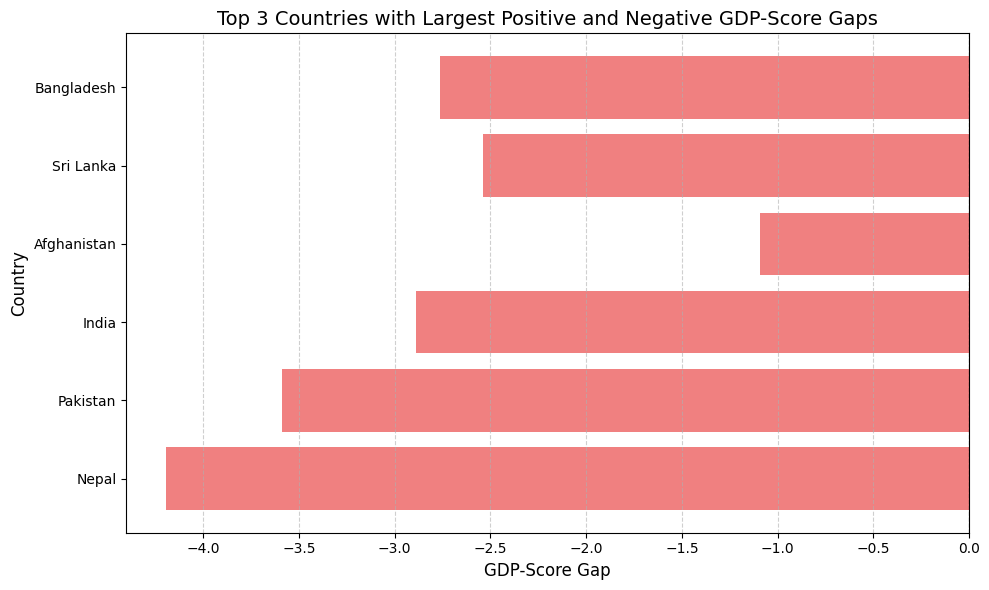

In [65]:
import matplotlib.pyplot as plt

# top 3 countries with smallest and largest gap
top_negative_gaps = south_asia_data.nsmallest(3, 'GDP-Score Gap')
top_positive_gaps = south_asia_data.nlargest(3, 'GDP-Score Gap')

highlighted_gaps = pd.concat([top_negative_gaps, top_positive_gaps])

plt.figure(figsize=(10, 6))
plt.barh(highlighted_gaps['Country name'], highlighted_gaps['GDP-Score Gap'],
         color=['lightcoral' if gap < 0 else 'darkgreen' for gap in highlighted_gaps['GDP-Score Gap']])
plt.xlabel('GDP-Score Gap', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Top 3 Countries with Largest Positive and Negative GDP-Score Gaps', fontsize=14)
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()


**3.3 Problem - 3 - Comparative Analysis:**
1. Descriptive Statistics:

* Calculate the mean, Standard deviation of the score for both South Asia and Middle East.

In [45]:
middle_eastern_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]

# Filtering the original dataset
middle_east_data = dataset[dataset['Country name'].isin(middle_eastern_countries)]

# Calculating the mean and standard deviation for the Middle East
middle_east_mean = middle_east_data['score'].mean()
middle_east_std = middle_east_data['score'].std()

# Define south_asian_countries (assuming it was defined previously)
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

# Filtering the original dataset for South Asia
south_asia_data = dataset[dataset['Country name'].isin(south_asian_countries)]

# Calculating the mean and standard deviation for South Asia
south_asia_mean = south_asia_data['score'].mean()  # Calculate south_asia_mean
south_asia_std = south_asia_data['score'].std()    # Calculate south_asia_std

# Now you can print the values
print(f"South Asia - Mean: {south_asia_mean}, Standard Deviation: {south_asia_std}")
print(f"Middle East - Mean: {middle_east_mean}, Standard Deviation: {middle_east_std}")

South Asia - Mean: 3.895666666666667, Standard Deviation: 1.1770690152521504
Middle East - Mean: 5.412100000000001, Standard Deviation: 1.5662011684327144


* Which region has higher happiness Scores on average?

In [46]:
if south_asia_mean > middle_east_mean:
    print(f"South Asia has a higher average happiness score: {south_asia_mean} vs {middle_east_mean}")
else:
    print(f"Middle East has a higher average happiness score: {middle_east_mean} vs {south_asia_mean}")

Middle East has a higher average happiness score: 5.412100000000001 vs 3.895666666666667


2. Top and Bottom Performers:

* Identify the top 3 and bottom 3 countries in each
region based on the score.

In [47]:
south_asia_top_3 = south_asia_data.sort_values(by='score', ascending=False).head(3)
south_asia_bottom_3 = south_asia_data.sort_values(by='score', ascending=True).head(3)

# Top 3 and bottom 3 countries in Middle East based on score
middle_east_top_3 = middle_east_data.sort_values(by='score', ascending=False).head(3)
middle_east_bottom_3 = middle_east_data.sort_values(by='score', ascending=True).head(3)

print("South Asia - Top 3 Countries:")
print(south_asia_top_3[['Country name', 'score']])
print("\nSouth Asia - Bottom 3 Countries:")
print(south_asia_bottom_3[['Country name', 'score']])

print("\nMiddle East - Top 3 Countries:")
print(middle_east_top_3[['Country name', 'score']])
print("\nMiddle East - Bottom 3 Countries:")
print(middle_east_bottom_3[['Country name', 'score']])

South Asia - Top 3 Countries:
    Country name  score
92         Nepal  5.158
107     Pakistan  4.657
125        India  4.054

South Asia - Bottom 3 Countries:
    Country name  score
142  Afghanistan  1.721
128   Bangladesh  3.886
127    Sri Lanka  3.898

Middle East - Top 3 Countries:
            Country name  score
4                 Israel  7.341
12                Kuwait  6.951
21  United Arab Emirates  6.733

Middle East - Bottom 3 Countries:
    Country name  score
141      Lebanon  2.707
132        Yemen  3.561
124       Jordan  4.186


* Plot bar charts comparing these charts.

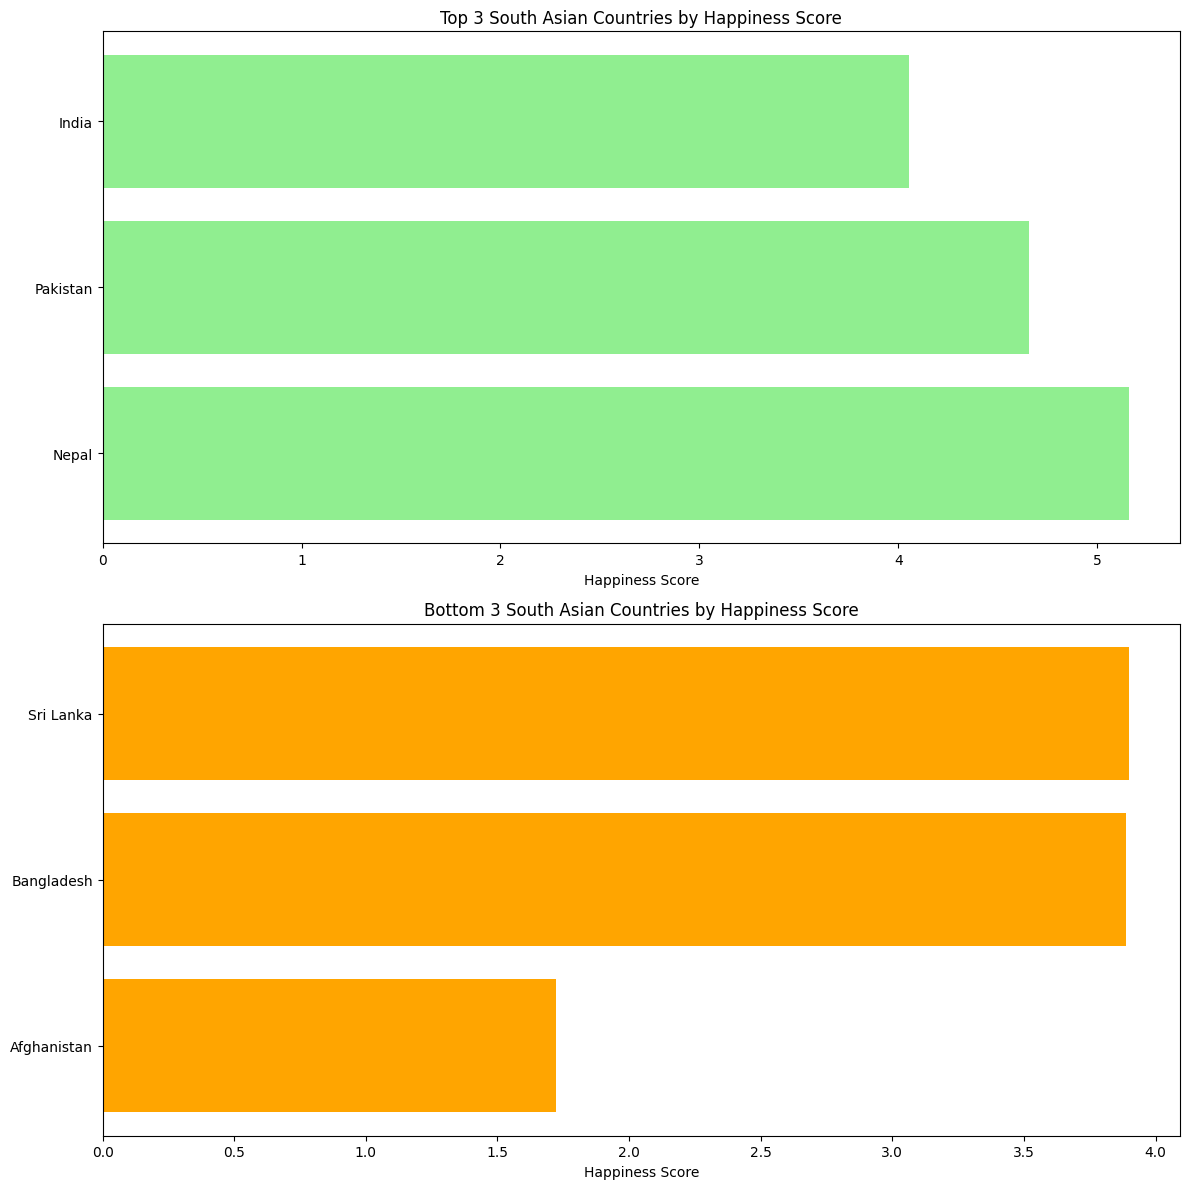

In [62]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, figsize=(12, 12))

# South Asia - Top 3
ax[0].barh(south_asia_top_3['Country name'], south_asia_top_3['score'], color='lightgreen')
ax[0].set_xlabel('Happiness Score')
ax[0].set_title('Top 3 South Asian Countries by Happiness Score')

# South Asia - Bottom 3
ax[1].barh(south_asia_bottom_3['Country name'], south_asia_bottom_3['score'], color='orange')
ax[1].set_xlabel('Happiness Score')
ax[1].set_title('Bottom 3 South Asian Countries by Happiness Score')

plt.tight_layout()
plt.show()


3. Metric Comparisons:


* Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy
between the regions using grouped bar charts.

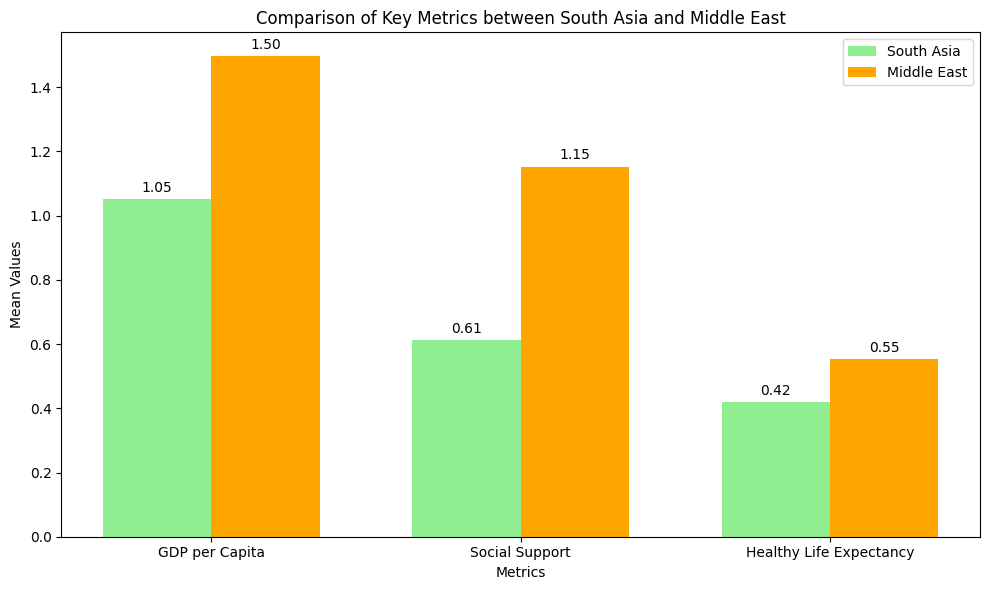

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure columns are stripped of whitespace
dataset.columns = dataset.columns.str.strip()

# Define regions
south_asian_countries = [
    'Afghanistan', 'Bangladesh', 'Bhutan', 'India',
    'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka'
]

middle_east_countries = [
    'Bahrain', 'Iran', 'Iraq', 'Israel', 'Jordan',
    'Kuwait', 'Lebanon', 'Oman', 'Qatar', 'Saudi Arabia',
    'Syria', 'United Arab Emirates', 'Yemen'
]

# Create subsets for both regions
south_asia_data = dataset[dataset['Country name'].isin(south_asian_countries)]
middle_east_data = dataset[dataset['Country name'].isin(middle_east_countries)]

# Calculating mean metrics
south_asia_metrics = [
    south_asia_data['Log GDP per capita'].mean(),
    south_asia_data['Social support'].mean(),
    south_asia_data['Healthy life expectancy'].mean()
]
middle_east_metrics = [
    middle_east_data['Log GDP per capita'].mean(),
    middle_east_data['Social support'].mean(),
    middle_east_data['Healthy life expectancy'].mean()
]

metrics = ['GDP per Capita', 'Social Support', 'Healthy Life Expectancy']

x = np.arange(len(metrics))  # The label locations
width = 0.35

# Create a grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width/2, south_asia_metrics, width, label='South Asia', color='lightgreen')
bar2 = ax.bar(x + width/2, middle_east_metrics, width, label='Middle East', color='orange')

# Set labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Mean Values')
ax.set_title('Comparison of Key Metrics between South Asia and Middle East')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Annotate the bars
def annotate_bars(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Offset for text
                    textcoords="offset points",
                    ha='center', va='bottom')

annotate_bars(bar1)
annotate_bars(bar2)

plt.tight_layout()
plt.show()



* Which metrics show the largest disparity between the two regions?

In [50]:
metric_differences = np.abs(np.array(middle_east_metrics) - np.array(south_asia_metrics))

# Create a DataFrame
disparity_df = pd.DataFrame({
    'Metric': metrics,
    'South Asia': south_asia_metrics,
    'Middle East': middle_east_metrics,
    'Difference': metric_differences
})
largest_disparity = disparity_df.loc[disparity_df['Difference'].idxmax()]

print("Metric Disparities between South Asia and the Middle East:")
print(disparity_df)
print("\nMetric with the Largest Disparity:")
print(largest_disparity)

Metric Disparities between South Asia and the Middle East:
                    Metric  South Asia  Middle East  Difference
0           GDP per Capita    1.051833     1.496333    0.444500
1           Social Support    0.611833     1.152778    0.540944
2  Healthy Life Expectancy    0.420333     0.554111    0.133778

Metric with the Largest Disparity:
Metric         Social Support
South Asia           0.611833
Middle East          1.152778
Difference           0.540944
Name: 1, dtype: object


4. Happiness Disparity:


* Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.

In [51]:
# Calculating range and CV
# South Asia
south_asia_score_max = south_asia_data['score'].max()
south_asia_score_min = south_asia_data['score'].min()
south_asia_range = south_asia_score_max - south_asia_score_min
south_asia_cv = south_asia_data['score'].std() / south_asia_data['score'].mean() * 100

# Middle East
middle_east_score_max = middle_east_data['score'].max()
middle_east_score_min = middle_east_data['score'].min()
middle_east_range = middle_east_score_max - middle_east_score_min
middle_east_cv = middle_east_data['score'].std() / middle_east_data['score'].mean() * 100

happiness_disparity_df = pd.DataFrame({
    'Region': ['South Asia', 'Middle East'],
    'Max Score': [south_asia_score_max, middle_east_score_max],
    'Min Score': [south_asia_score_min, middle_east_score_min],
    'Range (Max - Min)': [south_asia_range, middle_east_range],
    'Coefficient of Variation (CV %)': [south_asia_cv, middle_east_cv]
})

print("Happiness Disparity (Range & CV) between South Asia and the Middle East:")
print(happiness_disparity_df)

Happiness Disparity (Range & CV) between South Asia and the Middle East:
        Region  Max Score  Min Score  Range (Max - Min)  \
0   South Asia      5.158      1.721              3.437   
1  Middle East      7.341      2.707              4.634   

   Coefficient of Variation (CV %)  
0                        30.214829  
1                        28.938881  


* Which region has greater variability in happiness?

In [52]:
# Checking which region has greater variability
if south_asia_cv > middle_east_cv:
    greater_variability_region = "South Asia"
else:
    greater_variability_region = "Middle East"

print(f"The region with greater variability in happiness is: {greater_variability_region}")

The region with greater variability in happiness is: South Asia


5. Correlation Analysis:

* Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and
Generosity within each region.

In [53]:
# Calculate correlations for South Asia
south_asia_corr_freedom = south_asia_data[['score', 'Freedom to make life choices']].corr().iloc[0, 1]
south_asia_corr_generosity = south_asia_data[['score', 'Generosity']].corr().iloc[0, 1]

# for Middle East
middle_east_corr_freedom = middle_east_data[['score', 'Freedom to make life choices']].corr().iloc[0, 1]
middle_east_corr_generosity = middle_east_data[['score', 'Generosity']].corr().iloc[0, 1]

correlation_df = pd.DataFrame({
    'Metric': ['Freedom to Make Life Choices', 'Generosity'],
    'South Asia Correlation': [south_asia_corr_freedom, south_asia_corr_generosity],
    'Middle East Correlation': [middle_east_corr_freedom, middle_east_corr_generosity]
})

print("Correlation of Score with Key Metrics in South Asia and Middle East:")
print(correlation_df)

Correlation of Score with Key Metrics in South Asia and Middle East:
                         Metric  South Asia Correlation  \
0  Freedom to Make Life Choices                0.800519   
1                    Generosity                0.874512   

   Middle East Correlation  
0                 0.863220  
1                 0.627524  


* Create scatter plots to visualize and interpret the relationships.

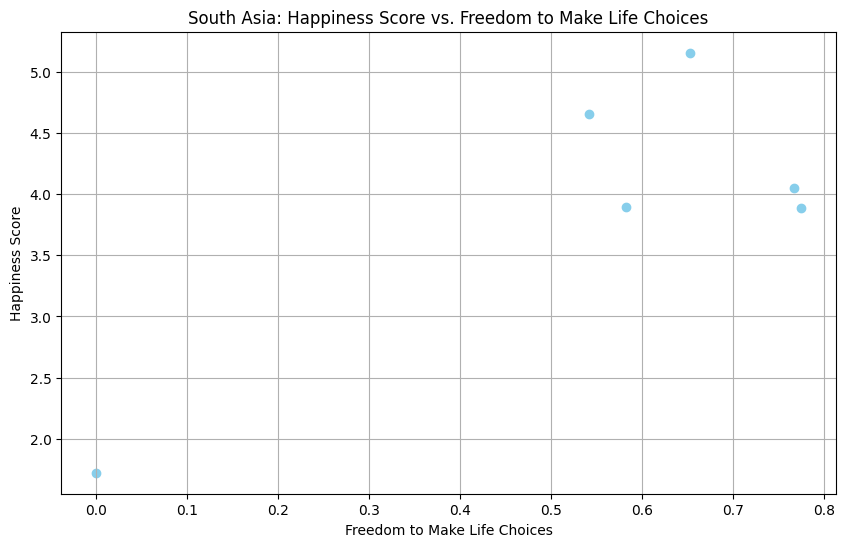

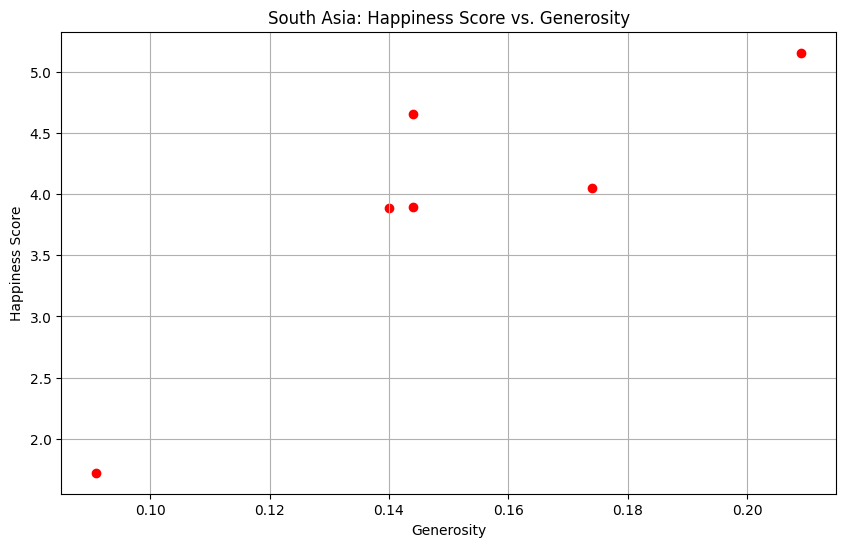

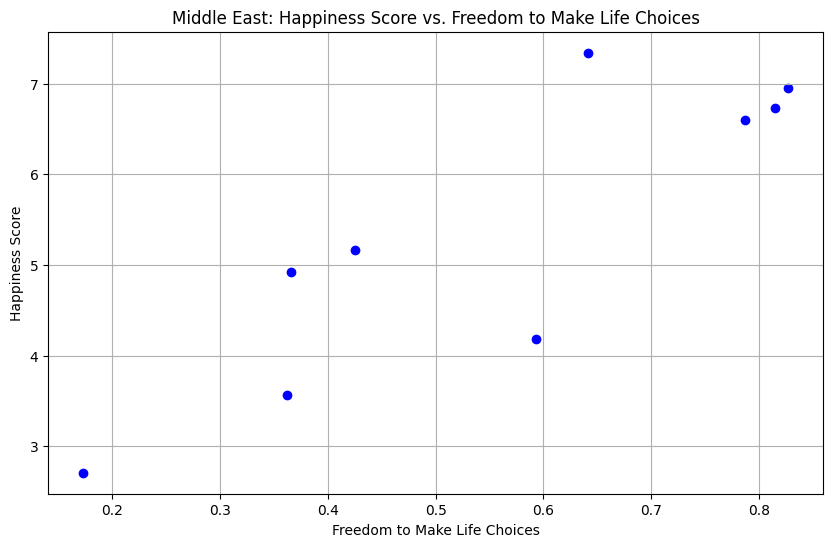

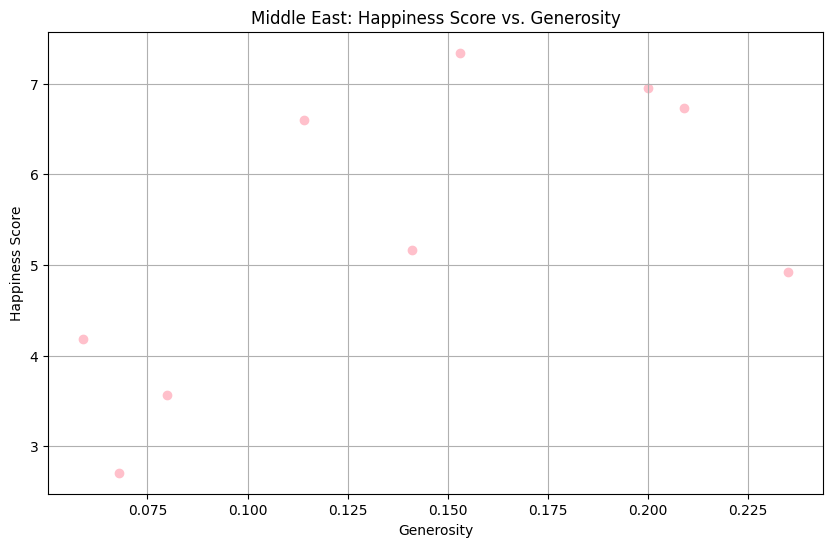

In [54]:
import matplotlib.pyplot as plt

# South Asia
# Happiness Score vs. Freedom to Make Life Choices
plt.figure(figsize=(10, 6))
plt.scatter(south_asia_data['Freedom to make life choices'], south_asia_data['score'], color='skyblue')
plt.title('South Asia: Happiness Score vs. Freedom to Make Life Choices')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Happiness Score')
plt.grid(True)
plt.show()

# Happiness Score vs. Generosity
plt.figure(figsize=(10, 6))
plt.scatter(south_asia_data['Generosity'], south_asia_data['score'], color='red')
plt.title('South Asia: Happiness Score vs. Generosity')
plt.xlabel('Generosity')
plt.ylabel('Happiness Score')
plt.grid(True)
plt.show()

# Middle east
# Happiness Score vs. Freedom to Make Life Choices
plt.figure(figsize=(10, 6))
plt.scatter(middle_east_data['Freedom to make life choices'], middle_east_data['score'], color='blue')
plt.title('Middle East: Happiness Score vs. Freedom to Make Life Choices')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Happiness Score')
plt.grid(True)
plt.show()

# Happiness Score vs. Generosity
plt.figure(figsize=(10, 6))
plt.scatter(middle_east_data['Generosity'], middle_east_data['score'], color='pink')
plt.title('Middle East: Happiness Score vs. Generosity')
plt.xlabel('Generosity')
plt.ylabel('Happiness Score')
plt.grid(True)
plt.show()

6. Outlier Detection:


*  Identify outlier countries in both regions based on Score and GDP per Capita.

In [55]:
def identify_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Identify outliers for Score and GDP per Capita
south_asia_outliers_score = identify_outliers(south_asia_data, 'score')
south_asia_outliers_gdp = identify_outliers(south_asia_data, 'Log GDP per capita')

middle_east_outliers_score = identify_outliers(middle_east_data, 'score')
middle_east_outliers_gdp = identify_outliers(middle_east_data, 'Log GDP per capita')


south_asia_outliers = pd.concat([south_asia_outliers_score, south_asia_outliers_gdp]).drop_duplicates()
middle_east_outliers = pd.concat([middle_east_outliers_score, middle_east_outliers_gdp]).drop_duplicates()

print("South Asia Outliers (Score & GDP per Capita):")
print(south_asia_outliers[['Country name', 'score', 'Log GDP per capita']])
print("\nMiddle East Outliers (Score & GDP per Capita):")
print(middle_east_outliers[['Country name', 'score', 'Log GDP per capita']])

South Asia Outliers (Score & GDP per Capita):
    Country name  score  Log GDP per capita
142  Afghanistan  1.721               0.628

Middle East Outliers (Score & GDP per Capita):
Empty DataFrame
Columns: [Country name, score, Log GDP per capita]
Index: []


* Plot these outliers and discuss their implications.

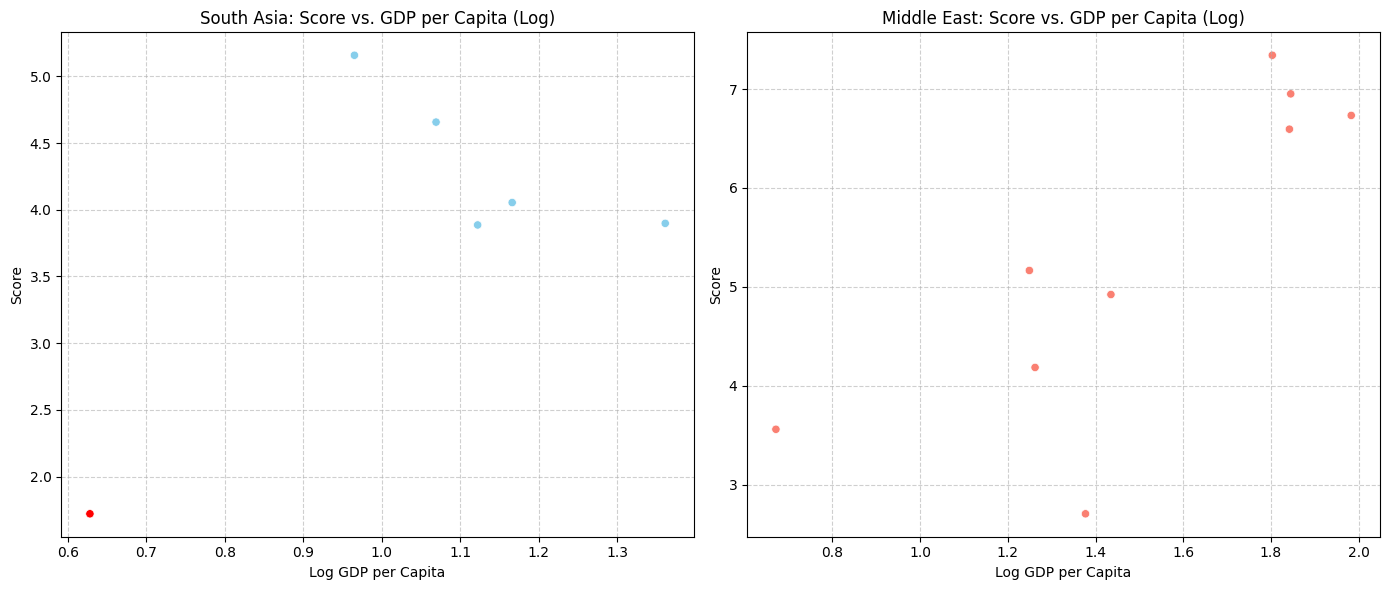

In [56]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# South Asia
sns.scatterplot(
    ax=ax[0],
    data=south_asia_data,
    x='Log GDP per capita',
    y='score',
    hue=south_asia_data['Country name'].isin(south_asia_outliers['Country name']),
    palette={True: 'red', False: 'skyblue'},
    legend=False
)
ax[0].set_title("South Asia: Score vs. GDP per Capita (Log)")
ax[0].set_xlabel("Log GDP per Capita")
ax[0].set_ylabel("Score")
ax[0].grid(True, linestyle='--', alpha=0.6)

# Middle Eastt
sns.scatterplot(
    ax=ax[1],
    data=middle_east_data,
    x='Log GDP per capita',
    y='score',
    hue=middle_east_data['Country name'].isin(middle_east_outliers['Country name']),
    palette={True: 'red', False: 'salmon'},
    legend=False
)
ax[1].set_title("Middle East: Score vs. GDP per Capita (Log)")
ax[1].set_xlabel("Log GDP per Capita")
ax[1].set_ylabel("Score")
ax[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

7. Visualization:


* Create boxplots comparing the distribution of Score between South Asia and the Middle East.

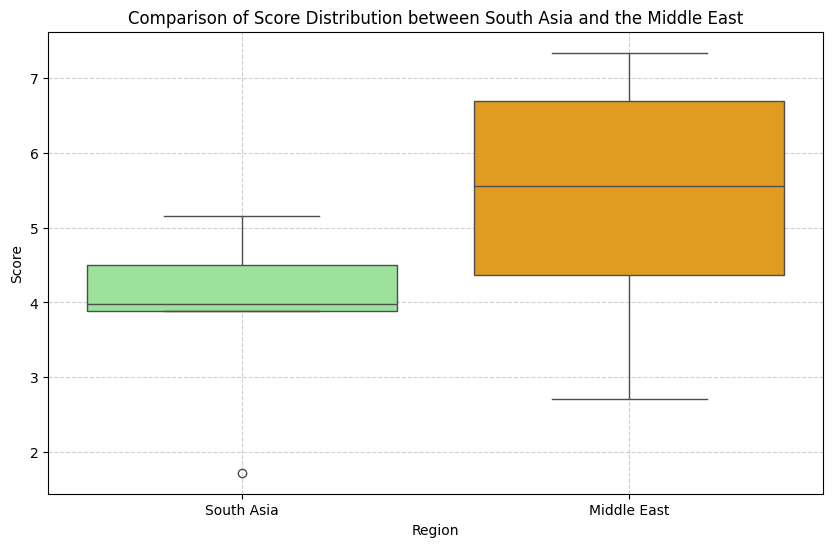

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming south_asia_data and middle_east_data are already defined
# ... (your previous code) ...

# Combine data for plotting
regional_scores = pd.concat([
    south_asia_data[['Country name', 'score']].assign(Region='South Asia'),  # Changed 'south_asian_scores' to 'south_asia_data'
    middle_east_data[['Country name', 'score']].assign(Region='Middle East') # Changed 'middle_eastern_scores' to 'middle_east_data'
])

# Create boxplots with explicit hue assignment
plt.figure(figsize=(10, 6))
sns.boxplot(data=regional_scores, x='Region', y='score', hue='Region', palette=['lightgreen', 'orange'])

# Customize the plot
plt.title("Comparison of Score Distribution between South Asia and the Middle East")
plt.xlabel("Region")
plt.ylabel("Score")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
